[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW9.ipynb)

**Problem 1** A number of measurements were collected for a large variety of cars in order to predict fuel efficiency of the car and to understand what factors significantly affect fuel efficiency. You can read in this data here
cars = pd.read_csv("https://richardson.byu.edu/220/cars.csv")
More information on this data can be found here: https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Auto%20MPG
Your task is to build a model that we can use to determine important information about the relationship between fuel efficiency and the other factors.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree


cars = pd.read_csv("https://richardson.byu.edu/220/cars.csv")
cars.head()

,mpg,cylinder,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,American,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,American,buick
2,18.0,8,318.0,150,3436,11.0,70,American,plymouth
3,16.0,8,304.0,150,3433,12.0,70,American,amc
4,17.0,8,302.0,140,3449,10.5,70,American,ford


Part a. Build and tune a linear regression model to predict the target variable, mpg or miles per gallon, using all the other variables besides car_name as predictors.  Tune the model so that only significant features remain.

In [3]:
train_data, test_data = train_test_split(cars, test_size=0.2, random_state=42)

model_formula = 'mpg ~ displacement + horsepower + weight + model_year + origin'
model2 = smf.ols(formula=model_formula, data=train_data).fit()

print(model2.summary())

y_pred = model2.predict(test_data)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     245.7
Date:                Thu, 04 Dec 2025   Prob (F-statistic):          8.07e-114
Time:                        20:46:24   Log-Likelihood:                -817.19
No. Observations:                 313   AIC:                             1648.
Df Residuals:                     306   BIC:                             1675.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -19.2232      4

Part b. You will likely find the variable weight significant. What is the confidence interval for the coefficient associated with weight?

It is a 95% confidence interval (0.025 - 0.975) at a coefficent between -0.234 and -0.177.

Part c. You are asked, how does weight affect fuel efficiency. Answer the question while providing some uncertainty to the answer (i.e. interpret the confidence interval).

There is a 95% confidence that the true decrease of fuel efficiency when weight increases by 1 standard deviation is somewhere between 0.234 and 0.177 standard deviations.

**Problem 2** Explore adding higher order terms into the model

Part a. Fit and tune a model that includes the interaction between weight and model_year.

In [4]:
predictors = ['displacement', 'horsepower', 'weight',
                   'model_year', 'origin']

train_data['weight_year'] = train_data['weight'] * train_data['model_year']
test_data['weight_year']  = test_data['weight'] * test_data['model_year']

new_predictors = [
    'weight_year'
]

all_predictors = predictors + new_predictors

formula = "mpg ~ " + " + ".join(all_predictors)

model = smf.ols(formula=formula, data=train_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     253.0
Date:                Thu, 04 Dec 2025   Prob (F-statistic):          5.60e-123
Time:                        20:46:24   Log-Likelihood:                -792.61
No. Observations:                 313   AIC:                             1601.
Df Residuals:                     305   BIC:                             1631.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -120.2265     14

Part b. Interpret this model, including the interactions, to a non-technical audience using no numbers.

A car from Europe or a car from Japan is expected to have a better affect on fuel efficency compared to a car from USA. A higher displacement and newer model will be expected to increase fuel efficiency individually. A higher horsepower car is expected to decrease fuel efficiency. Newer cars are expected to have lower fuel efficency when the weight is increased compared to older cars.

Part c. Examine using all higher order terms in the model. Using out of sample metrics, compare a model with no higher terms to a model with all higher order terms (no reducing the full model yet). Remember to keep car name out of the predictor set.

In [5]:
continuous_cols = ['cylinder', 'displacement', 'horsepower','weight','acceleration']
categorical_cols = ['model_year', 'origin']

X_continuous = cars[continuous_cols]
X_categorical = cars[categorical_cols]
y = cars["mpg"]

poly = PolynomialFeatures(2)
X_continuous_transformed = poly.fit_transform(X_continuous)
hot_names = poly.get_feature_names_out(X_continuous.columns)
X_cont_poly = pd.DataFrame(X_continuous_transformed,columns = hot_names)

X_categorical_dummies = pd.get_dummies(X_categorical, drop_first=True).astype(int)

X_full = pd.concat([X_cont_poly,X_categorical_dummies],axis = 1)
for continuous_col in continuous_cols:
    for dummy_col in X_categorical_dummies:
        interaction_term_name = f"{continuous_col}_x_{dummy_col}"
        X_full[interaction_term_name] = X_full[continuous_col] * X_full[dummy_col]


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_full, y, test_size=0.2, random_state=1234)

mod_full = sm.OLS(y_train2,X_train2).fit()
mod_full.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     63.99
Date:                Thu, 04 Dec 2025   Prob (F-statistic):          1.25e-114
Time:                        20:46:25   Log-Likelihood:                -720.90
No. Observations:                 313   AIC:                             1520.
Df Residuals:                     274   BIC:                             1666.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
1                                 53.2176     60.476      0.880      0.380     -65.839     172.274
cylinder                          -1.4179      9.985     -0.142      0.887     -21.075      18.240
displacement                      -0.1680      0.238     -0.705      0.481      -0.637       0.301
horsepower                         0.4327      0.451      0.959      0.338      -0.455       1.321
weight                            -0.0056      0.022     -0.257      0.797      -0.048       0.037
acceleration                      -6.2447      2.866     -2.179      0.030     -11.888      -0.602
cylinder^2                        -0.2267      0.503     -0.451      0.653      -1.217       0.763
cylinder displacement             -0.0059      0.022     -0.269      0.789      -0.049       0.038
cylinder horsepower                0.0150      0.030      0.502      0.616      -0.044       0.074
cylinder weight                    0.0014      0.001      1.040      0.299      -0.001       0.004
cylinder acceleration              0.3052      0.203      1.507      0.133      -0.093       0.704
displacement^2                     0.0002      0.000      0.543      0.588      -0.000       0.001
displacement horsepower           -0.0002      0.001     -0.280      0.780      -0.001       0.001
displacement weight            -8.073e-06    3.5e-05     -0.231      0.818    -7.7e-05    6.09e-05
displacement acceleration         -0.0008      0.006     -0.153      0.878      -0.012       0.010
horsepower^2                      -0.0005      0.001     -0.680      0.497      -0.002       0.001
horsepower weight               2.237e-05   7.48e-05      0.299      0.765      -0.000       0.000
horsepower acceleration           -0.0098      0.011     -0.886      0.376      -0.031       0.012
weight^2                        2.095e-07   2.23e-06      0.094      0.925   -4.18e-06     4.6e-06
weight acceleration             7.687e-05      0.001      0.136      0.892      -0.001       0.001
acceleration^2                    -0.0245      0.047     -0.521      0.603      -0.117       0.068
model_year                         0.2829      0.687      0.412      0.681      -1.070       1.635
origin_European                  -12.4417      7.034     -1.769      0.078     -26.289       1.406
origin_Japanese                  -17.1007      8.548     -2.000      0.046     -33.930      -0.272
cylinder_x_model_year             -0.0694      0.114     -0.608      0.544      -0.294       0.155
cylinder_x_origin_European        -0.7967      1.352     -0.589      0.556      -3.459       1.865
cylinder_x_origin_Japanese         0.9752      1.281      0.762      0.447      -1.546       3.496
displacement_x_model_year          0.0024      0.003      0.857      0.392      -0.003       0.008
displacement_x

In [6]:
train_data, test_data = train_test_split(cars, test_size=0.2, random_state=42)

model_formula = 'mpg ~ displacement + cylinder + acceleration + horsepower + weight + model_year + origin'
model4 = smf.ols(formula=model_formula, data=train_data).fit()

print(model4.summary())

y_pred = model4.predict(test_data)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     183.8
Date:                Thu, 04 Dec 2025   Prob (F-statistic):          1.20e-111
Time:                        20:46:25   Log-Likelihood:                -816.67
No. Observations:                 313   AIC:                             1651.
Df Residuals:                     304   BIC:                             1685.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -19.3319      5

In [7]:
mspe_full = np.sqrt(mean_squared_error(y_test2, mod_full.predict(X_test2)))
print(f"MSPE with higher order: {mspe_full}")

original_predictors_df = cars[['displacement', 'acceleration', 'cylinder', 'horsepower', 'weight', 'model_year', 'origin']]
s = cars['mpg']

X_train, X_test, y_train, y_test = train_test_split(original_predictors_df, s, test_size=0.2, random_state=1234)

mspe_model = np.sqrt(mean_squared_error(y_test, model4.predict(X_test)))
print(f"MSPE without higher order: {mspe_model}")

MSPE with higher order: 2.9726702011098634
MSPE without higher order: 3.509856746224288


Part d. Reduce the full model to a set of significant predictors. Compare this reduced model to the previous two models (no higher order terms and all higher order terms).

In [8]:
mod_temp = mod_full
X_train_temp = X_train2

while max(mod_temp.pvalues[1:]) > 0.05 and (len(X_train_temp.columns) > 1):
  max_pvalue = np.argmax(mod_temp.pvalues[1:])+1
  X_train_temp = X_train_temp.drop(columns = X_train_temp.columns[max_pvalue])
  mod_temp = sm.OLS(y_train2,X_train_temp).fit()

mod_reduced = mod_temp

mspe_reduced = np.sqrt(mean_squared_error(y_test2,mod_reduced.predict(X_test2[X_train_temp.columns])))

print(f"MSPE with higher order: {mspe_full}")
print(f"MSPE with higher order reduced: {mspe_reduced}")
print(f"MSPE without higher order: {mspe_model}")

MSPE with higher order: 2.9726702011098634
MSPE with higher order reduced: 2.9971894619943233
MSPE without higher order: 3.509856746224288


In [9]:
mod_reduced.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     170.1
Date:                Thu, 04 Dec 2025   Prob (F-statistic):          6.17e-136
Time:                        20:46:26   Log-Likelihood:                -725.44
No. Observations:                 313   AIC:                             1483.
Df Residuals:                     297   BIC:                             1543.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
1                                 83.1403      7.621     10.909      0.000      68.142      98.138
displacement                      -0.1120      0.040     -2.823      0.005      -0.190      -0.034
acceleration                      -8.0536      0.729    -11.054      0.000      -9.487      -6.620
cylinder^2                        -0.3514      0.135     -2.611      0.009      -0.616      -0.087
cylinder weight                    0.0018      0.000      8.652      0.000       0.001       0.002
cylinder acceleration              0.1440      0.062      2.304      0.022       0.021       0.267
origin_European                  -17.2074      3.168     -5.432      0.000     -23.441     -10.973
origin_Japanese                  -19.9564      5.586     -3.573      0.000     -30.949      -8.964
cylinder_x_model_year             -0.0561      0.025     -2.281      0.023      -0.105      -0.008
cylinder_x_origin_Japanese         2.0107      0.701      2.870      0.004       0.632       3.389
displacement_x_model_year          0.0015      0.001      2.762      0.006       0.000       0.003
horsepower_x_model_year           -0.0005      0.000     -2.786      0.006      -0.001      -0.000
weight_x_model_year               -0.0002   1.83e-05    -11.771      0.000      -0.000      -0.000
acceleration_x_model_year          0.0904      0.006     14.852      0.000       0.078       0.102
acceleration_x_origin_European     1.1246      0.190      5.905      0.000       0.750       1.499
acceleration_x_origin_Japanese     0.7798      0.253      3.078      0.002       0.281       1.278
==============================================================================
Omnibus:                       44.297   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.303
Skew:                           0.645   Prob(JB):                     7.53e-27
Kurtosis:                       5.750   Cond. No.                     1.45e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Part e. Explore building a model using the original variables and adding only a few important higher terms you found from the full model. Again compare this model to the others.

In [10]:
cars_with_interactions = cars.copy()

cars_with_interactions['weight_year'] = cars_with_interactions['weight'] * cars_with_interactions['model_year']
cars_with_interactions['cylinder_weight'] = cars_with_interactions['cylinder'] * cars_with_interactions['weight']
cars_with_interactions['acceleration_year'] = cars_with_interactions['acceleration'] * cars_with_interactions['model_year']
cars_with_interactions['cylinder_year'] = cars_with_interactions['cylinder'] * cars_with_interactions['model_year']
cars_with_interactions['horsepower_year'] = cars_with_interactions['horsepower'] * cars_with_interactions['model_year']


predictors_model3 = ['displacement', 'horsepower', 'weight',
                   'model_year', 'acceleration', 'cylinder', 'origin']
new_predictors_model3 = ['weight_year', 'cylinder_weight', 'acceleration_year', 'cylinder_year', 'horsepower_year']

formula_parts_model3 = predictors_model3 + new_predictors_model3
formula_model3 = "mpg ~ " + " + ".join(formula_parts_model3)

train_df_model3, test_df_model3 = train_test_split(cars_with_interactions, test_size=0.2, random_state=1234)

model3 = smf.ols(formula=formula_model3, data=train_df_model3).fit()
y_pred_model3 = model3.predict(test_df_model3)
mspe_model3 = np.sqrt(mean_squared_error(test_df_model3['mpg'], y_pred_model3))

print(f"MSPE with all higher order terms: {mspe_full}")
print(f"MSPE with higher order terms reduced: {mspe_reduced}")
print(f"MSPE without higher order terms: {mspe_model}")
print(f"MSPE with selected higher order terms: {mspe_model3}")

MSPE with all higher order terms: 2.9726702011098634
MSPE with higher order terms reduced: 2.9971894619943233
MSPE without higher order terms: 3.509856746224288
MSPE with selected higher order terms: 3.1961718084860986


**Problem 3** Use the car data and build a regression tree. Use out of sample metrics to determine the best depth for the tree. Using Feature importances, what variables are considered to be most significant. How does this compare to the linear regression model?

RSME out: 3.8384813103985524
R^2 out: 0.7797932237428535


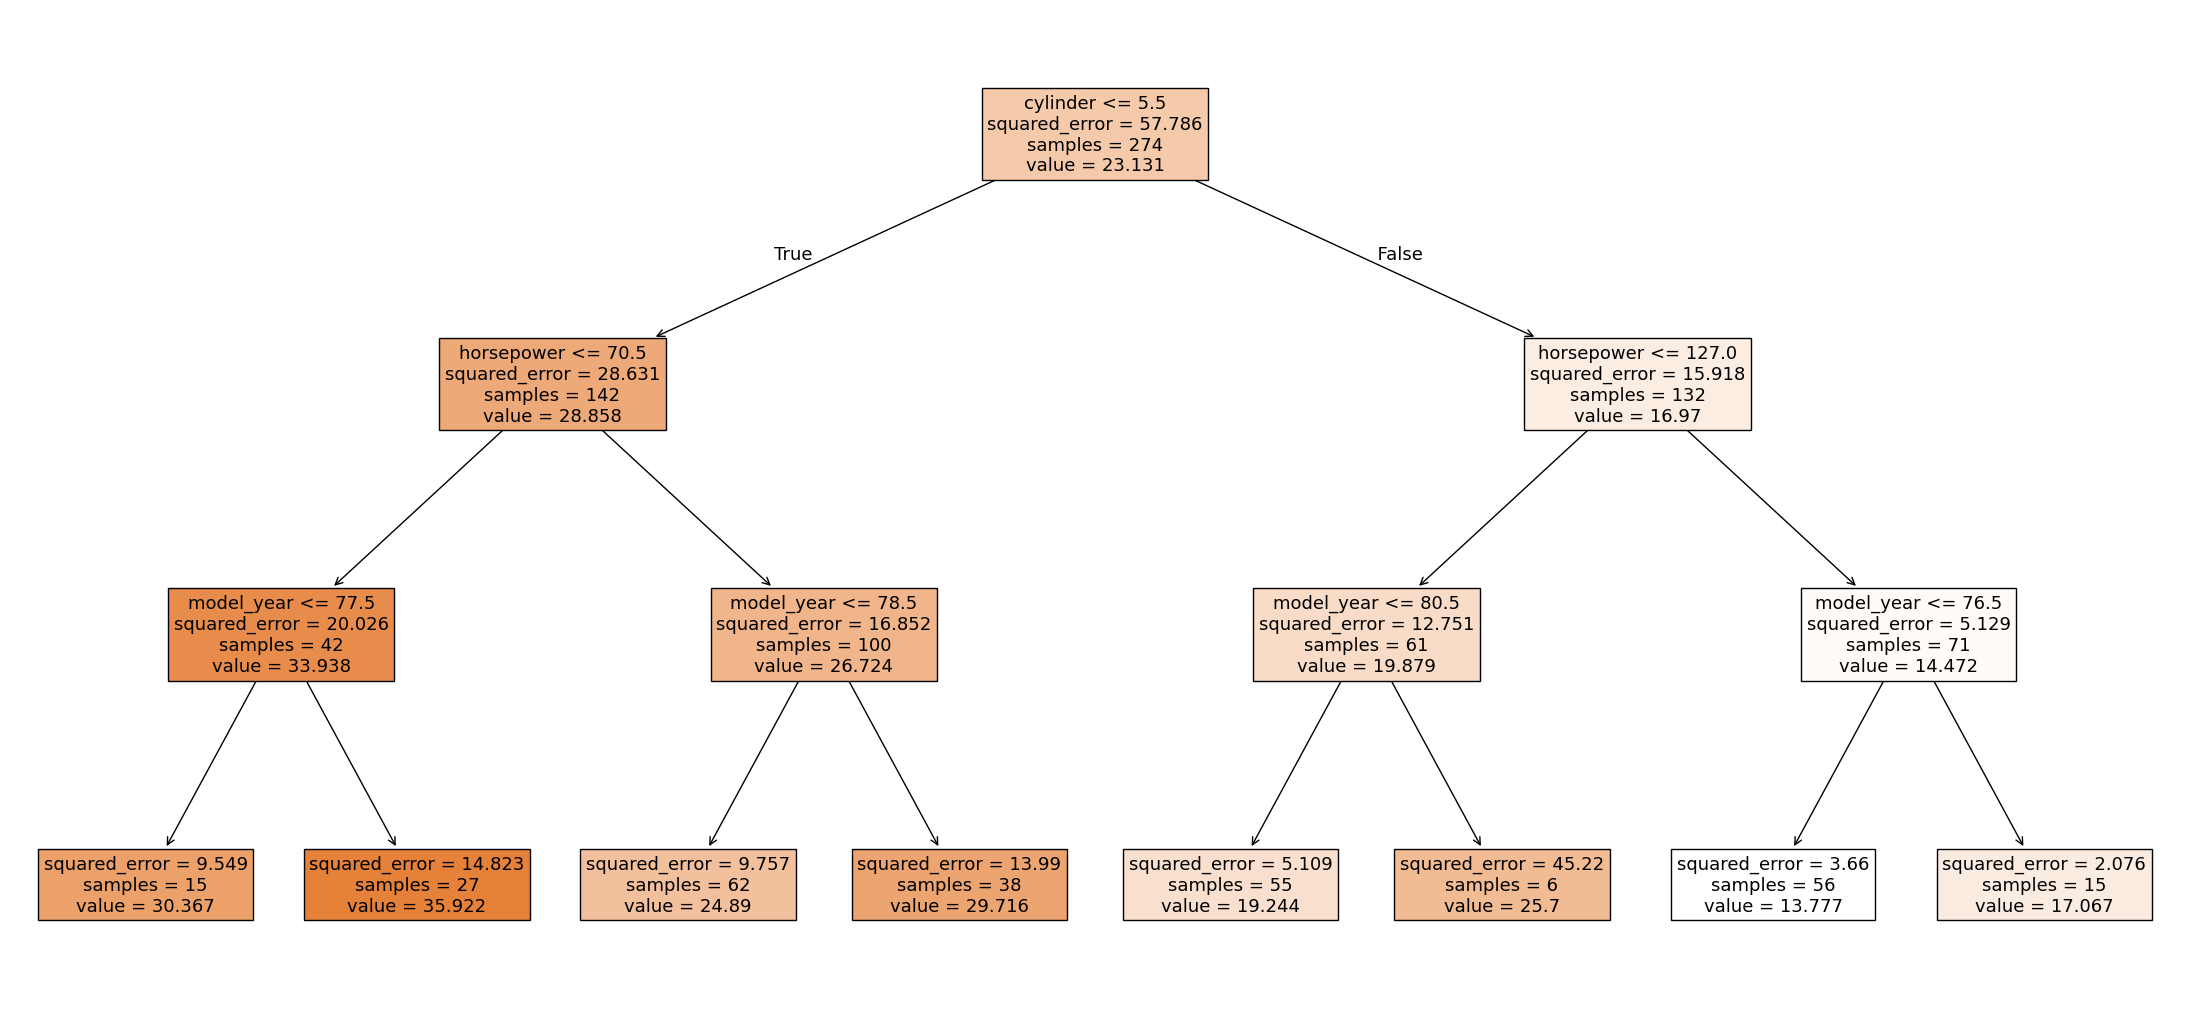

In [11]:
predictors = cars[['cylinder', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']]
X_tree = pd.get_dummies(predictors, drop_first=True)
y = cars["mpg"]

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y, test_size=0.3, random_state=1234)

tree_prep = DecisionTreeRegressor(max_depth = 3)
mod_tree = tree_prep.fit(X_train_tree,y_train_tree)

out_sample_tree = mod_tree.predict(X_test_tree)

rmse_tree_out = np.sqrt(mean_squared_error(y_test_tree,out_sample_tree))
r2_tree_out = r2_score(y_test_tree,out_sample_tree)
print(f'RSME out: {rmse_tree_out}')
print(f'R^2 out: {r2_tree_out}')

plt.figure(figsize=(28, 13))
plot_tree(mod_tree, feature_names=X_train_tree.columns, fontsize=13, filled=True)
plt.show()


<Axes: >

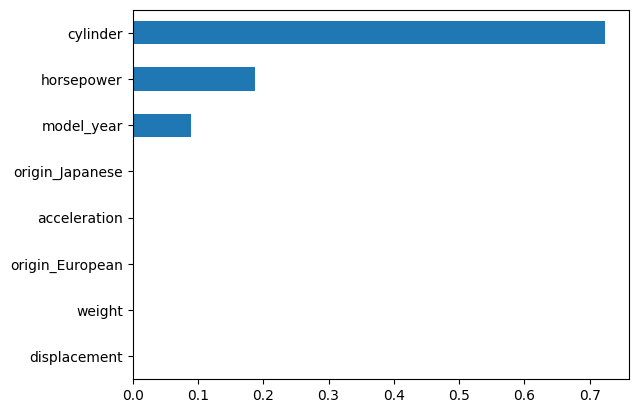

In [12]:
mod_tree.feature_importances_
dict(zip(X_train_tree.columns,mod_tree.feature_importances_))
pd.Series(mod_tree.feature_importances_, index=X_train_tree.columns).sort_values().plot(kind='barh')

In the linear regression, there was a higher r^2 for all of the models. In the tree regression model, the cylinder, horsepower, and model_year were important for the model to split the data. Horsepower and model_year were also significant in the linear regression model, so that makes sense, but the cylinder was not signifcant which is interesing.

**Problem 4**: Consider a new American car with a 6 cylinders, a displacement of 200, a horsepower of 100, a weight of 3600, an acceleration of 14, and a model year of 83.

Part a. For the best regression model in Problem 2, and the best regression tree model in Problem 3, determine the prediction for the new car.

In [13]:
total = -19.3319 + 6*(-0.3421) + 200*(0.0192) + 100*(-0.0216) + 3600*(-0.0064) + 14*(0.0422) + 83*(0.7972)

new_car1 = pd.DataFrame([{
    'cylinder': 6,
    'displacement': 200,
    'horsepower': 100,
    'weight': 3600,
    'acceleration': 14,
    'model_year': 83,
    'origin_European': 0,
    'origin_Japanese': 0
}])

new_car = pd.DataFrame([{
    'origin': 'American',
    'cylinder': 6,
    'displacement': 200,
    'horsepower': 100,
    'weight': 3600,
    'acceleration': 14,
    'model_year': 83
}])


mpg_tree_pred = mod_tree.predict(new_car1)
mod_linear = model4.predict(new_car)

print("Prediction for regression tree model:", mpg_tree_pred[0])
print(f'Prediciton for linear regression model: {mod_linear[0]}')


Prediction for regression tree model: 25.7
Prediciton for linear regression model: 23.928162037475403


Part b. Find the confidence interval for the expected value of the prediction in the linear regression model.

I put them both in part c

Part c. Find the confidence interval for the predicted value using the linear regression model

In [14]:
model4.get_prediction(new_car).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,23.928162,0.681916,22.586289,25.270035,17.227565,30.628759


Part d. Explain why those confidence intervals are different.

The reason why they are different is because finding the predicted value tells us the confidence interval for an individual car which will have more uncertainty.

Part e. Use bootstrapping to find a confidence interval for the prediction using the regression tree model.

In [15]:
n_bootstrap_samples = 1000
bootstrap_predictions = []

for _ in range(n_bootstrap_samples):
    X_sample, y_sample = resample(X_train_tree, y_train_tree)

    tree_prep.fit(X_sample, y_sample)

    pred = tree_prep.predict(new_car1)[0]
    bootstrap_predictions.append(pred)

bootstrap_predictions = np.array(bootstrap_predictions)

lower_bound = np.percentile(bootstrap_predictions, 2.5)
upper_bound = np.percentile(bootstrap_predictions, 97.5)

print(f"Lower Bound = {lower_bound}")
print(f"Upper Bound = {upper_bound}")

Lower Bound = 18.19410370879121
Upper Bound = 38.0


**Problem 5** Airfoils are the part of an airplane wing that allows for stability in flight due to their shape. NASA did a study of the noise level of various shapes and sizes of airfoils.  The data set for their study can be loaded using

airfoil = pd.read_table("https://richardson.byu.edu/220/airfoil.csv")

More information on this data can be found here: https://archive.ics.uci.edu/ml/datasets/airfoil+self-noise. The target variable in the data set is labeled as Pressure. The rest are predictors.

Part a. Build and tune a linear model where you scale and standardize the data.

In [16]:
airfoil = pd.read_csv("https://richardson.byu.edu/220/airfoil.csv")

In [17]:
train_data, test_data = train_test_split(airfoil, test_size=0.2, random_state=42)

model_formula = 'Pressure ~ scale(Frequency) + scale(Angle) + scale(Length) + scale(Velocity) + scale(Thickness)'
model5 = smf.ols(formula=model_formula, data=train_data).fit()

print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:               Pressure   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     242.5
Date:                Thu, 04 Dec 2025   Prob (F-statistic):          6.08e-179
Time:                        20:46:33   Log-Likelihood:                -3597.7
No. Observations:                1202   AIC:                             7207.
Df Residuals:                    1196   BIC:                             7238.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          124.8770      0.140  

Part b. The manufacturing company did just build a new airfoil. They want you to use the model to predict the noise level at various velocities and frequencies. The data to predict can be found at

airfoil_new = pd.read_csv("https://richardson.byu.edu/220/airfoil_new.csv")

Find predictions for each of the new rows.

In [19]:
airfoil_new = pd.read_csv("https://richardson.byu.edu/220/airfoil_new.csv")

predictions = model5.predict(airfoil_new)

airfoil_new["Predicted_Pressure"] = predictions

airfoil_new

,Frequency,Angle,Length,Velocity,Thickness,Pressure,Predicted_Pressure
0,250,4,0.3048,40,0.004978,NaN,123.311392
1,315,4,0.3048,40,0.004978,NaN,123.228732
2,400,4,0.3048,40,0.004978,NaN,123.120637
3,500,4,0.3048,40,0.004978,NaN,122.993466
4,630,4,0.3048,40,0.004978,NaN,122.828145
5,800,4,0.3048,40,0.004978,NaN,122.611955
6,1000,4,0.3048,40,0.004978,NaN,122.357615
7,1250,4,0.3048,40,0.004978,NaN,122.039689
8,1600,4,0.3048,40,0.004978,NaN,121.594593
9,2000,4,0.3048,40,0.004978,NaN,121.085911


Part c. The manufacturer is exploring using longer airfoil lengths than done before. They want to use lengths of 0.4 meters and they want to use your model to predict the noise level. Are there any issues with that?

Yes because my model does not explore length higher than 0.3048. It is able to predict on data it has seen, but it has not observed any length at 0.4 meters. This is called extrapolation.